# VarnaAir - Open Programme

## Introduction ℹ️


## Libraries 📚
First, let's begin by importing the libraries and checking their versions.

In [330]:
import pandas
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

## Data provisioning 📦

In [331]:
url = "https://api.openaq.org/v3/locations"

headers = {
    "X-API-Key": "c1061fd64a9bd88562b4bb823b7900ccdfd263a9a7aa54614de834dac611a4ca"
}
params = {
    "coordinates": "43.224389,27.915733",  # center of Varna
    "radius": 5000,                        # 5 km radius
    "limit": 100,                         
}

response = requests.get(url, headers=headers, params=params)

data = response.json().get("results", [])
df_nearby_stations = pandas.DataFrame(data)
print(df_nearby_stations[["id", "name", "locality"]])

        id                         name              locality
0     8843  AMS SOU Angel Kanchev-Varna                 Варна
1  2162113           AMS Chaika - Varna  National air network


## Angel Kanchev-Varna

In [332]:
url = "https://api.openaq.org/v3/locations/8843/sensors"

response = requests.get(url, headers=headers)
response.raise_for_status()

data = response.json()
results = data.get("results", [])

df_latest1 = pandas.DataFrame(results)

df_latest1

,id,name,parameter,datetimeFirst,datetimeLast,coverage,latest,summary
0,25777,o3 µg/m³,"{'id': 3, 'name': 'o3', 'units': 'µg/m³', 'dis...","{'utc': '2020-04-20T18:00:00Z', 'local': '2020...","{'utc': '2025-06-19T22:00:00Z', 'local': '2025...","{'expectedCount': 1, 'expectedInterval': '01:0...","{'datetime': {'utc': '2025-06-19T22:00:00Z', '...","{'min': -1.0, 'q02': None, 'q25': None, 'media..."
1,25778,no2 µg/m³,"{'id': 5, 'name': 'no2', 'units': 'µg/m³', 'di...","{'utc': '2020-04-20T18:00:00Z', 'local': '2020...","{'utc': '2025-06-19T22:00:00Z', 'local': '2025...","{'expectedCount': 1, 'expectedInterval': '01:0...","{'datetime': {'utc': '2025-06-19T22:00:00Z', '...","{'min': -1.0, 'q02': None, 'q25': None, 'media..."
2,25776,pm10 µg/m³,"{'id': 1, 'name': 'pm10', 'units': 'µg/m³', 'd...","{'utc': '2020-04-20T18:00:00Z', 'local': '2020...","{'utc': '2025-06-19T22:00:00Z', 'local': '2025...","{'expectedCount': 1, 'expectedInterval': '01:0...","{'datetime': {'utc': '2025-06-19T22:00:00Z', '...","{'min': -1.0, 'q02': None, 'q25': None, 'media..."
3,25779,co µg/m³,"{'id': 4, 'name': 'co', 'units': 'µg/m³', 'dis...","{'utc': '2020-04-20T18:00:00Z', 'local': '2020...","{'utc': '2025-06-19T22:00:00Z', 'local': '2025...","{'expectedCount': 1, 'expectedInterval': '01:0...","{'datetime': {'utc': '2025-06-19T22:00:00Z', '...","{'min': -1000.0, 'q02': None, 'q25': None, 'me..."
4,25774,so2 µg/m³,"{'id': 6, 'name': 'so2', 'units': 'µg/m³', 'di...","{'utc': '2020-04-20T18:00:00Z', 'local': '2020...","{'utc': '2025-06-19T22:00:00Z', 'local': '2025...","{'expectedCount': 1, 'expectedInterval': '01:0...","{'datetime': {'utc': '2025-06-19T22:00:00Z', '...","{'min': -1.0, 'q02': None, 'q25': None, 'media..."
5,25775,pm25 µg/m³,"{'id': 2, 'name': 'pm25', 'units': 'µg/m³', 'd...","{'utc': '2020-04-20T18:00:00Z', 'local': '2020...","{'utc': '2025-06-19T22:00:00Z', 'local': '2025...","{'expectedCount': 1, 'expectedInterval': '01:0...","{'datetime': {'utc': '2025-06-19T22:00:00Z', '...","{'min': -1.0, 'q02': None, 'q25': None, 'media..."
6,4272879,no µg/m³,"{'id': 19843, 'name': 'no', 'units': 'µg/m³', ...","{'utc': '2023-03-29T18:00:00Z', 'local': '2023...","{'utc': '2024-03-11T11:00:00Z', 'local': '2024...","{'expectedCount': 1, 'expectedInterval': '01:0...","{'datetime': {'utc': '2024-03-11T11:00:00Z', '...","{'min': 0.14, 'q02': None, 'q25': None, 'media..."


In [333]:
base_url = "https://api.openaq.org/v3/sensors/{sensor_id}/measurements"

# sensor ids for Angel Kanchev
sensor_ids = [25775, 25778, 25776, 25779, 25774, 25777, 4272879]  

sensor_data_frames = []

for sensor_id in sensor_ids:
    url = base_url.format(sensor_id=sensor_id)
    response = requests.get(url, headers=headers)
    response.raise_for_status()

    data = response.json()
    results = data.get("results", [])

    if results:
        df1 = pandas.DataFrame(results)

        df1 = df1.assign(
            sensor_id=sensor_id,
            datetime_from_utc=df1['period'].apply(lambda x: x['datetimeFrom']['utc'] if x else None),
            datetime_from_local=df1['period'].apply(lambda x: x['datetimeFrom']['local'] if x else None),
            datetime_to_utc=df1['period'].apply(lambda x: x['datetimeTo']['utc'] if x else None),
            datetime_to_local=df1['period'].apply(lambda x: x['datetimeTo']['local'] if x else None),
            parameter_name=df1['parameter'].apply(lambda x: x.get('name') if isinstance(x, dict) else None),
            parameter_units=df1['parameter'].apply(lambda x: x.get('units') if isinstance(x, dict) else None)
        ).drop(columns=['flagInfo', 'parameter', 'period', 'summary', 'coverage', 'coordinates'])

        sensor_data_frames.append(df1)

combined_df1 = pandas.concat(sensor_data_frames, ignore_index=True)
combined_df1

,value,sensor_id,datetime_from_utc,datetime_from_local,datetime_to_utc,datetime_to_local,parameter_name,parameter_units
0,18.38,25775,2020-04-20T17:00:00Z,2020-04-20T20:00:00+03:00,2020-04-20T18:00:00Z,2020-04-20T21:00:00+03:00,pm25,µg/m³
1,19.34,25775,2020-04-20T18:00:00Z,2020-04-20T21:00:00+03:00,2020-04-20T19:00:00Z,2020-04-20T22:00:00+03:00,pm25,µg/m³
2,18.33,25775,2020-04-20T19:00:00Z,2020-04-20T22:00:00+03:00,2020-04-20T20:00:00Z,2020-04-20T23:00:00+03:00,pm25,µg/m³
3,17.23,25775,2020-04-20T20:00:00Z,2020-04-20T23:00:00+03:00,2020-04-20T21:00:00Z,2020-04-21T00:00:00+03:00,pm25,µg/m³
4,19.66,25775,2020-04-20T21:00:00Z,2020-04-21T00:00:00+03:00,2020-04-20T22:00:00Z,2020-04-21T01:00:00+03:00,pm25,µg/m³
...,...,...,...,...,...,...,...,...
695,14.49,4272879,2023-04-02T16:00:00Z,2023-04-02T19:00:00+03:00,2023-04-02T17:00:00Z,2023-04-02T20:00:00+03:00,no,µg/m³
696,1.68,4272879,2023-04-02T17:00:00Z,2023-04-02T20:00:00+03:00,2023-04-02T18:00:00Z,2023-04-02T21:00:00+03:00,no,µg/m³
697,1.76,4272879,2023-04-02T18:00:00Z,2023-04-02T21:00:00+03:00,2023-04-02T19:00:00Z,2023-04-02T22:00:00+03:00,no,µg/m³
698,2.85,4272879,2023-04-02T19:00:00Z,2023-04-02T22:00:00+03:00,2023-04-02T20:00:00Z,2023-04-02T23:00:00+03:00,no,µg/m³


In [334]:
pivot_df1 = combined_df1.pivot_table(
    index='datetime_from_local',
    columns='parameter_name',
    values='value'
).reset_index()

pivot_df1

parameter_name,datetime_from_local,co,no,no2,o3,pm10,pm25,so2
0,2020-04-20T20:00:00+03:00,400.0,NaN,23.33,56.93,24.27,18.38,20.16
1,2020-04-20T21:00:00+03:00,530.0,NaN,51.60,25.44,24.27,19.34,19.85
2,2020-04-20T22:00:00+03:00,560.0,NaN,44.01,23.04,23.85,18.33,20.77
3,2020-04-20T23:00:00+03:00,500.0,NaN,27.78,30.51,21.48,17.23,20.10
4,2020-04-21T00:00:00+03:00,480.0,NaN,25.94,25.95,21.46,19.66,19.95
...,...,...,...,...,...,...,...,...
197,2023-04-02T19:00:00+03:00,NaN,14.49,NaN,NaN,NaN,NaN,NaN
198,2023-04-02T20:00:00+03:00,NaN,1.68,NaN,NaN,NaN,NaN,NaN
199,2023-04-02T21:00:00+03:00,NaN,1.76,NaN,NaN,NaN,NaN,NaN
200,2023-04-02T22:00:00+03:00,NaN,2.85,NaN,NaN,NaN,NaN,NaN


## AMS Chaika - Varna

In [335]:
url = "https://api.openaq.org/v3/locations/2162113/sensors"

response = requests.get(url, headers=headers)
response.raise_for_status()

data = response.json()
results = data.get("results", [])

df_latest2 = pandas.DataFrame(results)

df_latest2

,id,name,parameter,datetimeFirst,datetimeLast,coverage,latest,summary
0,7774820,no µg/m³,"{'id': 19843, 'name': 'no', 'units': 'µg/m³', ...","{'utc': '2024-01-28T23:00:00Z', 'local': '2024...","{'utc': '2024-03-11T11:00:00Z', 'local': '2024...","{'expectedCount': 1, 'expectedInterval': '01:0...","{'datetime': {'utc': '2024-03-11T11:00:00Z', '...","{'min': 1.36, 'q02': None, 'q25': None, 'media..."
1,7774916,so2 µg/m³,"{'id': 6, 'name': 'so2', 'units': 'µg/m³', 'di...","{'utc': '2024-01-28T23:00:00Z', 'local': '2024...","{'utc': '2025-06-19T22:00:00Z', 'local': '2025...","{'expectedCount': 1, 'expectedInterval': '01:0...","{'datetime': {'utc': '2025-06-19T22:00:00Z', '...","{'min': -1.0, 'q02': None, 'q25': None, 'media..."
2,7775044,co µg/m³,"{'id': 4, 'name': 'co', 'units': 'µg/m³', 'dis...","{'utc': '2024-01-28T23:00:00Z', 'local': '2024...","{'utc': '2025-06-19T22:00:00Z', 'local': '2025...","{'expectedCount': 1, 'expectedInterval': '01:0...","{'datetime': {'utc': '2025-06-19T22:00:00Z', '...","{'min': -1000.0, 'q02': None, 'q25': None, 'me..."
3,7775045,no2 µg/m³,"{'id': 5, 'name': 'no2', 'units': 'µg/m³', 'di...","{'utc': '2024-01-28T23:00:00Z', 'local': '2024...","{'utc': '2025-06-19T22:00:00Z', 'local': '2025...","{'expectedCount': 1, 'expectedInterval': '01:0...","{'datetime': {'utc': '2025-06-19T22:00:00Z', '...","{'min': -1.0, 'q02': None, 'q25': None, 'media..."
4,8613114,pm10 µg/m³,"{'id': 1, 'name': 'pm10', 'units': 'µg/m³', 'd...","{'utc': '2024-03-18T07:00:00Z', 'local': '2024...","{'utc': '2024-06-06T06:00:00Z', 'local': '2024...","{'expectedCount': 1, 'expectedInterval': '01:0...","{'datetime': {'utc': '2024-06-06T06:00:00Z', '...","{'min': -1.0, 'q02': None, 'q25': None, 'media..."


In [336]:
base_url = "https://api.openaq.org/v3/sensors/{sensor_id}/measurements"

# sensor ids for Chaika
sensor_ids = [7774820, 7774916, 7775044, 7775045, 8613114]  

sensor_data_frames = []

for sensor_id in sensor_ids:
    url = base_url.format(sensor_id=sensor_id)
    response = requests.get(url, headers=headers)
    response.raise_for_status()

    data = response.json()
    results = data.get("results", [])

    if results:
        df2 = pandas.DataFrame(results)

        df2 = df2.assign(
            sensor_id=sensor_id,
            datetime_from_utc=df2['period'].apply(lambda x: x['datetimeFrom']['utc'] if x else None),
            datetime_from_local=df2['period'].apply(lambda x: x['datetimeFrom']['local'] if x else None),
            datetime_to_utc=df2['period'].apply(lambda x: x['datetimeTo']['utc'] if x else None),
            datetime_to_local=df2['period'].apply(lambda x: x['datetimeTo']['local'] if x else None),
            parameter_name=df2['parameter'].apply(lambda x: x.get('name') if isinstance(x, dict) else None),
            parameter_units=df2['parameter'].apply(lambda x: x.get('units') if isinstance(x, dict) else None)
        ).drop(columns=['flagInfo', 'parameter', 'period', 'summary', 'coverage', 'coordinates'])

        sensor_data_frames.append(df2)

combined_df2 = pandas.concat(sensor_data_frames, ignore_index=True)
combined_df2

,value,sensor_id,datetime_from_utc,datetime_from_local,datetime_to_utc,datetime_to_local,parameter_name,parameter_units
0,1.51,7774820,2024-01-28T22:00:00Z,2024-01-29T00:00:00+02:00,2024-01-28T23:00:00Z,2024-01-29T01:00:00+02:00,no,µg/m³
1,1.65,7774820,2024-01-28T23:00:00Z,2024-01-29T01:00:00+02:00,2024-01-29T00:00:00Z,2024-01-29T02:00:00+02:00,no,µg/m³
2,1.54,7774820,2024-01-29T00:00:00Z,2024-01-29T02:00:00+02:00,2024-01-29T01:00:00Z,2024-01-29T03:00:00+02:00,no,µg/m³
3,1.62,7774820,2024-01-29T01:00:00Z,2024-01-29T03:00:00+02:00,2024-01-29T02:00:00Z,2024-01-29T04:00:00+02:00,no,µg/m³
4,1.66,7774820,2024-01-29T02:00:00Z,2024-01-29T04:00:00+02:00,2024-01-29T03:00:00Z,2024-01-29T05:00:00+02:00,no,µg/m³
...,...,...,...,...,...,...,...,...
495,-1.00,8613114,2024-03-29T19:00:00Z,2024-03-29T21:00:00+02:00,2024-03-29T20:00:00Z,2024-03-29T22:00:00+02:00,pm10,µg/m³
496,-1.00,8613114,2024-03-29T20:00:00Z,2024-03-29T22:00:00+02:00,2024-03-29T21:00:00Z,2024-03-29T23:00:00+02:00,pm10,µg/m³
497,-1.00,8613114,2024-03-29T21:00:00Z,2024-03-29T23:00:00+02:00,2024-03-29T22:00:00Z,2024-03-30T00:00:00+02:00,pm10,µg/m³
498,-1.00,8613114,2024-03-29T22:00:00Z,2024-03-30T00:00:00+02:00,2024-03-29T23:00:00Z,2024-03-30T01:00:00+02:00,pm10,µg/m³


In [337]:
pivot_df2 = combined_df2.pivot_table(
    index='datetime_from_local',
    columns='parameter_name',
    values='value'
).reset_index()

pivot_df2

parameter_name,datetime_from_local,co,no,no2,pm10,so2
0,2024-01-29T00:00:00+02:00,320.0,1.51,14.48,NaN,8.58
1,2024-01-29T01:00:00+02:00,320.0,1.65,14.48,NaN,8.46
2,2024-01-29T02:00:00+02:00,310.0,1.54,14.02,NaN,8.53
3,2024-01-29T03:00:00+02:00,310.0,1.62,14.40,NaN,8.35
4,2024-01-29T04:00:00+02:00,310.0,1.66,14.19,NaN,8.13
...,...,...,...,...,...,...
195,2024-03-29T21:00:00+02:00,NaN,NaN,NaN,-1.0,NaN
196,2024-03-29T22:00:00+02:00,NaN,NaN,NaN,-1.0,NaN
197,2024-03-29T23:00:00+02:00,NaN,NaN,NaN,-1.0,NaN
198,2024-03-30T00:00:00+02:00,NaN,NaN,NaN,-1.0,NaN


In [338]:
combined_df = pandas.concat([pivot_df1, pivot_df2], ignore_index=True)

In [339]:
combined_df.shape

(402, 8)

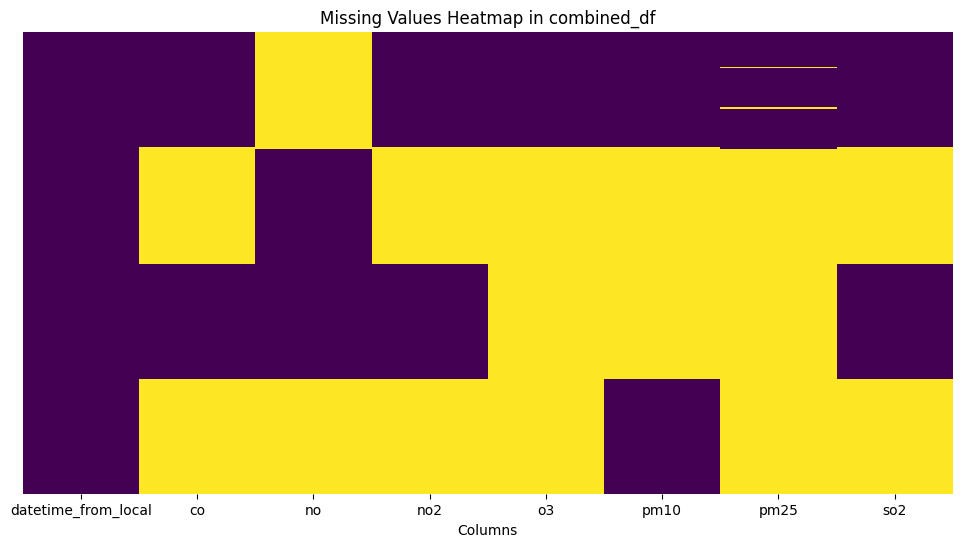

In [340]:
plt.figure(figsize=(12, 6))
sns.heatmap(combined_df.isnull(), 
            cbar=False, 
            cmap='viridis', 
            yticklabels=False)

plt.title('Missing Values Heatmap in combined_df')
plt.xlabel('Columns')
plt.show()

In [341]:
chaika1 = pandas.read_csv('datasets/openaq_location_2162113_measurments.csv')
chaika1.shape

(3000, 15)

In [342]:
chaika2 = pandas.read_csv('datasets/openaq_location_2162113_measurments (1).csv')
chaika2.shape

(1416, 15)

In [343]:
chaika3 = pandas.read_csv('datasets/openaq_location_2162113_measurments (2).csv')
chaika3.shape

(1857, 15)

In [344]:
chaika4 = pandas.read_csv('datasets/openaq_location_2162113_measurments (3).csv')
chaika4.shape

(1430, 15)

In [345]:
chaika5 = pandas.read_csv('datasets/openaq_location_2162113_measurments (4).csv')
chaika5.shape

(1354, 15)

In [346]:
chaika_dataset = pandas.concat([chaika1, chaika2, chaika3, chaika4, chaika5])

In [347]:
chaika_dataset.shape

(9057, 15)

In [348]:
chaika_dataset = chaika_dataset.pivot_table(
    index='datetimeLocal',
    columns='parameter',
    values='value'
).reset_index()

chaika_dataset

parameter,datetimeLocal,co,no2,so2
0,2025-01-01T20:00:00+02:00,1450.0,26.41,20.61
1,2025-01-02T01:00:00+02:00,1260.0,22.42,9.25
2,2025-01-02T02:00:00+02:00,1040.0,16.81,8.45
3,2025-01-02T11:00:00+02:00,940.0,22.20,11.81
4,2025-01-02T12:00:00+02:00,960.0,21.99,13.28
...,...,...,...,...
3045,2025-06-19T05:00:00+03:00,560.0,12.22,-1.00
3046,2025-06-19T06:00:00+03:00,560.0,12.20,-1.00
3047,2025-06-19T07:00:00+03:00,540.0,8.39,-1.00
3048,2025-06-19T09:00:00+03:00,540.0,11.03,-1.00


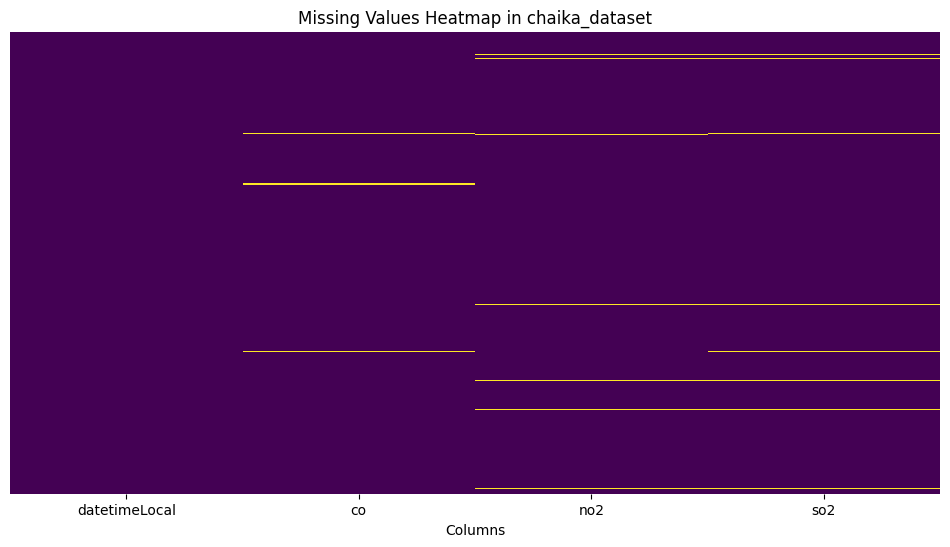

In [349]:
plt.figure(figsize=(12, 6))
sns.heatmap(chaika_dataset.isnull(), 
            cbar=False, 
            cmap='viridis', 
            yticklabels=False)

plt.title('Missing Values Heatmap in chaika_dataset')
plt.xlabel('Columns')
plt.show()

In [350]:
angel1 = pandas.read_csv('datasets/openaq_location_8843_measurments.csv')
angel1.shape

(6000, 15)

In [351]:
angel2 = pandas.read_csv('datasets/openaq_location_8843_measurments (1).csv')
angel2.shape

(2829, 15)

In [352]:
angel3 = pandas.read_csv('datasets/openaq_location_8843_measurments (2).csv')
angel3.shape

(3727, 15)

In [353]:
angel4 = pandas.read_csv('datasets/openaq_location_8843_measurments (3).csv')
angel4.shape

(2871, 15)

In [354]:
angel5 = pandas.read_csv('datasets/openaq_location_8843_measurments (4).csv')
angel5.shape

(2724, 15)

In [355]:
angel_dataset = pandas.concat([angel1, angel2, angel3, angel4, angel5])

In [356]:
angel_dataset.shape

(18151, 15)

In [357]:
angel_dataset = angel_dataset.pivot_table(
    index='datetimeLocal',
    columns='parameter',
    values='value'
).reset_index()

angel_dataset

parameter,datetimeLocal,co,no2,o3,pm10,pm25,so2
0,2025-01-01T20:00:00+02:00,1180.0,95.40,7.74,51.87,51.69,16.57
1,2025-01-02T01:00:00+02:00,490.0,34.49,37.32,44.20,12.47,16.00
2,2025-01-02T02:00:00+02:00,570.0,52.76,19.50,37.13,16.54,16.01
3,2025-01-02T11:00:00+02:00,650.0,70.78,25.91,34.11,21.86,16.45
4,2025-01-02T12:00:00+02:00,720.0,80.30,24.58,35.74,27.21,16.53
...,...,...,...,...,...,...,...
3070,2025-06-19T05:00:00+03:00,350.0,7.46,50.75,10.97,5.82,10.19
3071,2025-06-19T06:00:00+03:00,350.0,7.30,46.95,8.71,5.20,11.06
3072,2025-06-19T07:00:00+03:00,330.0,15.55,41.18,12.10,5.40,10.68
3073,2025-06-19T09:00:00+03:00,720.0,107.43,9.54,20.52,8.29,10.64


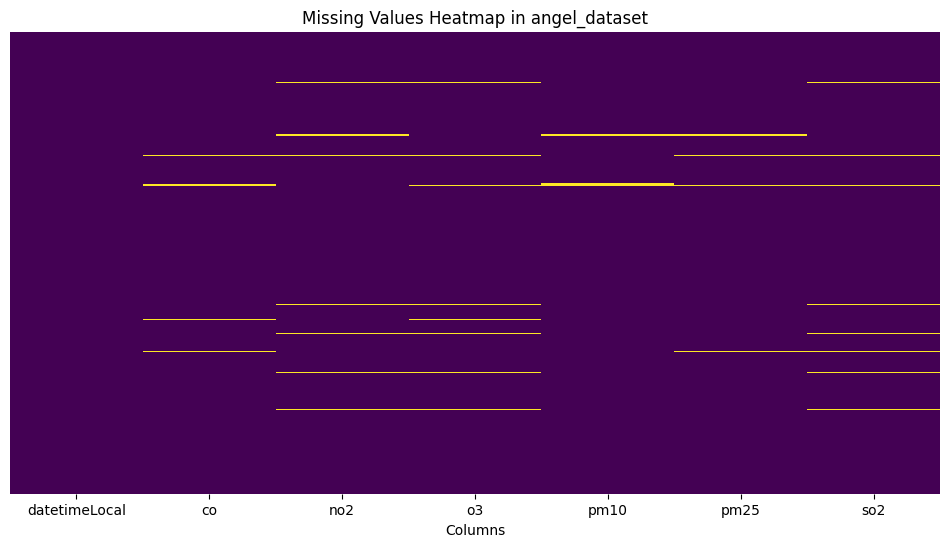

In [358]:
plt.figure(figsize=(12, 6))
sns.heatmap(angel_dataset.isnull(), 
            cbar=False, 
            cmap='viridis', 
            yticklabels=False)

plt.title('Missing Values Heatmap in angel_dataset')
plt.xlabel('Columns')
plt.show()

In [359]:
final_combined_df = pandas.concat([chaika_dataset, angel_dataset, combined_df])

In [360]:
final_combined_df.shape

(6527, 9)

In [361]:
final_combined_df.head()

,datetimeLocal,co,no2,so2,o3,pm10,pm25,datetime_from_local,no
0,2025-01-01T20:00:00+02:00,1450.0,26.41,20.61,NaN,NaN,NaN,NaN,NaN
1,2025-01-02T01:00:00+02:00,1260.0,22.42,9.25,NaN,NaN,NaN,NaN,NaN
2,2025-01-02T02:00:00+02:00,1040.0,16.81,8.45,NaN,NaN,NaN,NaN,NaN
3,2025-01-02T11:00:00+02:00,940.0,22.20,11.81,NaN,NaN,NaN,NaN,NaN
4,2025-01-02T12:00:00+02:00,960.0,21.99,13.28,NaN,NaN,NaN,NaN,NaN


In [362]:
final_combined_df['datetime_local'] = final_combined_df['datetime_from_local'].combine_first(final_combined_df['datetimeLocal'])
final_combined_df.drop(columns=['datetime_from_local', 'datetimeLocal'], inplace=True)

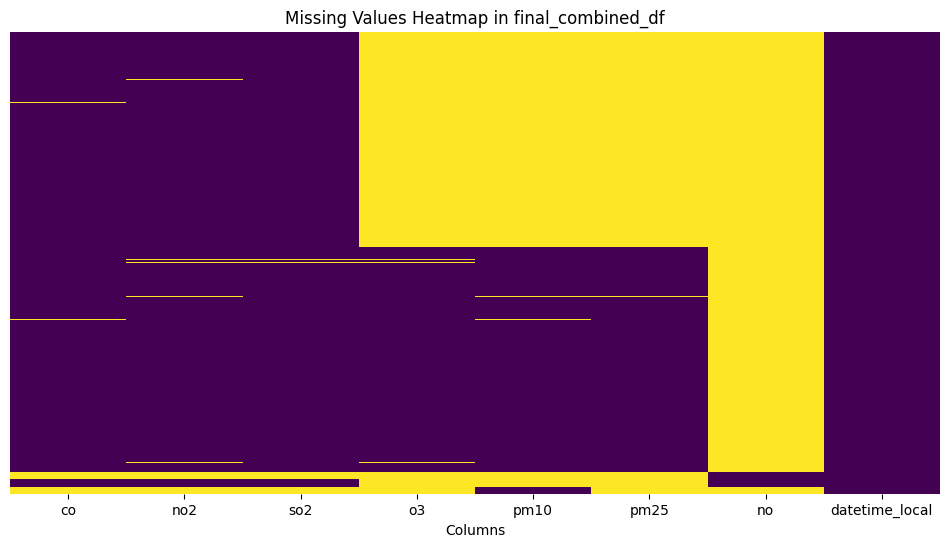

In [363]:
plt.figure(figsize=(12, 6))
sns.heatmap(final_combined_df.isnull(), 
            cbar=False, 
            cmap='viridis', 
            yticklabels=False)

plt.title('Missing Values Heatmap in final_combined_df')
plt.xlabel('Columns')
plt.show()

In [364]:
missing_percent = final_combined_df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))

no                96.935805
o3                52.290486
pm25              52.014708
pm10              50.375364
no2                4.703539
so2                4.473725
co                 3.968132
datetime_local     0.000000
dtype: float64


In [365]:
threshold = 0.7
final_combined_df = final_combined_df.loc[:, final_combined_df.isnull().mean() < threshold]

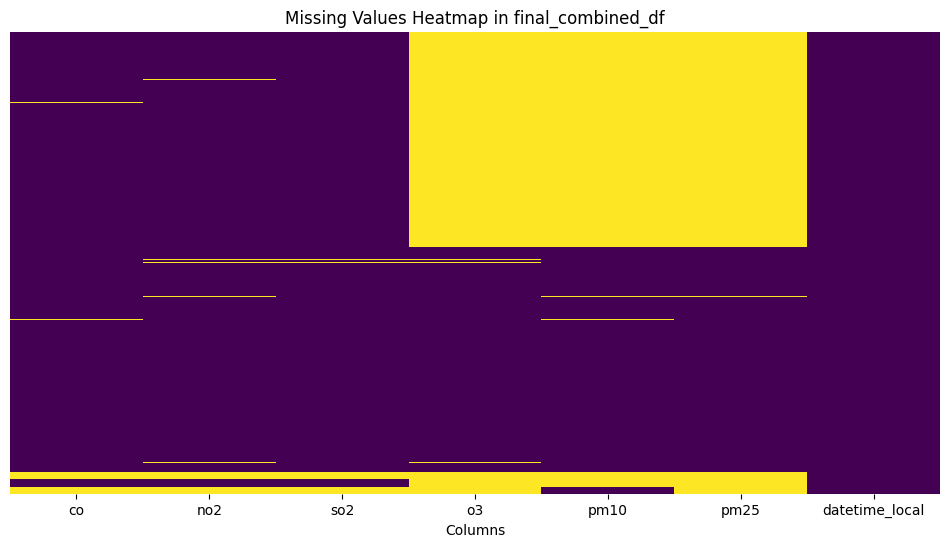

In [366]:
plt.figure(figsize=(12, 6))
sns.heatmap(final_combined_df.isnull(), 
            cbar=False, 
            cmap='viridis', 
            yticklabels=False)

plt.title('Missing Values Heatmap in final_combined_df')
plt.xlabel('Columns')
plt.show()

In [367]:
final_combined_df.head()

,co,no2,so2,o3,pm10,pm25,datetime_local
0,1450.0,26.41,20.61,NaN,NaN,NaN,2025-01-01T20:00:00+02:00
1,1260.0,22.42,9.25,NaN,NaN,NaN,2025-01-02T01:00:00+02:00
2,1040.0,16.81,8.45,NaN,NaN,NaN,2025-01-02T02:00:00+02:00
3,940.0,22.20,11.81,NaN,NaN,NaN,2025-01-02T11:00:00+02:00
4,960.0,21.99,13.28,NaN,NaN,NaN,2025-01-02T12:00:00+02:00


In [368]:
imputer = SimpleImputer(strategy='mean') 
final_combined_df[['co', 'no2', 'so2', 'o3', 'pm10', 'pm25']] = imputer.fit_transform(
    final_combined_df[['co', 'no2', 'so2', 'o3', 'pm10', 'pm25']]
)

In [369]:
final_combined_df.head()

,co,no2,so2,o3,pm10,pm25,datetime_local
0,1450.0,26.41,20.61,48.986644,23.599525,12.238624,2025-01-01T20:00:00+02:00
1,1260.0,22.42,9.25,48.986644,23.599525,12.238624,2025-01-02T01:00:00+02:00
2,1040.0,16.81,8.45,48.986644,23.599525,12.238624,2025-01-02T02:00:00+02:00
3,940.0,22.20,11.81,48.986644,23.599525,12.238624,2025-01-02T11:00:00+02:00
4,960.0,21.99,13.28,48.986644,23.599525,12.238624,2025-01-02T12:00:00+02:00


In [370]:
final_combined_df.isnull().sum()

co                0
no2               0
so2               0
o3                0
pm10              0
pm25              0
datetime_local    0
dtype: int64

In [371]:
def get_subindex(concentration, breakpoints):
    for Clow, Chigh, Ilow, Ihigh in breakpoints:
        if Clow <= concentration <= Chigh:
            return round((Ihigh - Ilow) / (Chigh - Clow) * (concentration - Clow) + Ilow)
    return None

In [372]:
# breakpoints for each pollutant (example values)
pm25_breakpoints = [
    (0.0, 12.0, 0, 50),
    (12.1, 35.4, 51, 100),
    (35.5, 55.4, 101, 150),
    (55.5, 150.4, 151, 200),
    (150.5, 250.4, 201, 300),
    (250.5, 350.4, 301, 400),
    (350.5, 500.4, 401, 500)
]
pm10_breakpoints = [
    (0, 54, 0, 50),
    (55, 154, 51, 100),
    (155, 254, 101, 150),
    (255, 354, 151, 200),
    (355, 424, 201, 300),
    (425, 504, 301, 400),
    (505, 604, 401, 500)
]
o3_breakpoints = [
    (0, 54, 0, 50),
    (55, 70, 51, 100),
    (71, 85, 101, 150),
    (86, 105, 151, 200),
    (106, 200, 201, 300)
]
co_breakpoints = [
    (0.0, 4.4, 0, 50),
    (4.5, 9.4, 51, 100),
    (9.5, 12.4, 101, 150),
    (12.5, 15.4, 151, 200),
    (15.5, 30.4, 201, 300),
    (30.5, 40.4, 301, 400),
    (40.5, 50.4, 401, 500)
]
no2_breakpoints = [
    (0, 53, 0, 50),
    (54, 100, 51, 100),
    (101, 360, 101, 150),
    (361, 649, 151, 200),
    (650, 1249, 201, 300),
    (1250, 1649, 301, 400),
    (1650, 2049, 401, 500)
]
so2_breakpoints = [
    (0, 35, 0, 50),
    (36, 75, 51, 100),
    (76, 185, 101, 150),
    (186, 304, 151, 200),
    (305, 604, 201, 300),
    (605, 804, 301, 400),
    (805, 1004, 401, 500)
]

def calculate_row_aqi(row):
    aqi_values = []
    
    if not pandas.isnull(row['pm25']):
        aqi_values.append(get_subindex(row['pm25'], pm25_breakpoints))
    if not pandas.isnull(row['pm10']):
        aqi_values.append(get_subindex(row['pm10'], pm10_breakpoints))
    if not pandas.isnull(row['o3']):
        aqi_values.append(get_subindex(row['o3'], o3_breakpoints))
    if not pandas.isnull(row['co']):
        aqi_values.append(get_subindex(row['co'] / 1000, co_breakpoints))  # µg/m³ to mg/m³
    if not pandas.isnull(row['no2']):
        aqi_values.append(get_subindex(row['no2'], no2_breakpoints))
    if not pandas.isnull(row['so2']):
        aqi_values.append(get_subindex(row['so2'], so2_breakpoints))
    
    return max([aqi for aqi in aqi_values if aqi is not None], default=None)

final_combined_df['AQI'] = final_combined_df.apply(calculate_row_aqi, axis=1)

In [373]:
def aqi_category(aqi):
    if aqi is None:
        return 'Unknown'
    elif aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

final_combined_df['AQI_Category'] = final_combined_df['AQI'].apply(aqi_category)


In [374]:
final_combined_df['AQI_Category'].value_counts()

AQI_Category
Moderate                          4667
Good                               760
Unhealthy for Sensitive Groups     563
Unhealthy                          328
Hazardous                          152
Very Unhealthy                      57
Name: count, dtype: int64